In [20]:
import pandas as pd
data1 = pd.read_csv(r"C:\Users\thdfy\OneDrive\바탕 화면\Datamining_Teampro\dong_predict\data\2022_final_차대사람.csv", encoding = 'euc-kr')
data2 = pd.read_csv(r"C:\Users\thdfy\OneDrive\바탕 화면\Datamining_Teampro\dong_predict\data\2022_final_차대차.csv", encoding = 'euc-kr')

Initial R2 Score for 차대사람 dataset: 0.4251872834585624
Initial R2 Score for 차대차 dataset: 0.2612197544701742
R2 Score for 차대사람 dataset after feature selection: 0.4268281623934057
R2 Score for 차대차 dataset after feature selection: 0.2434994344146919


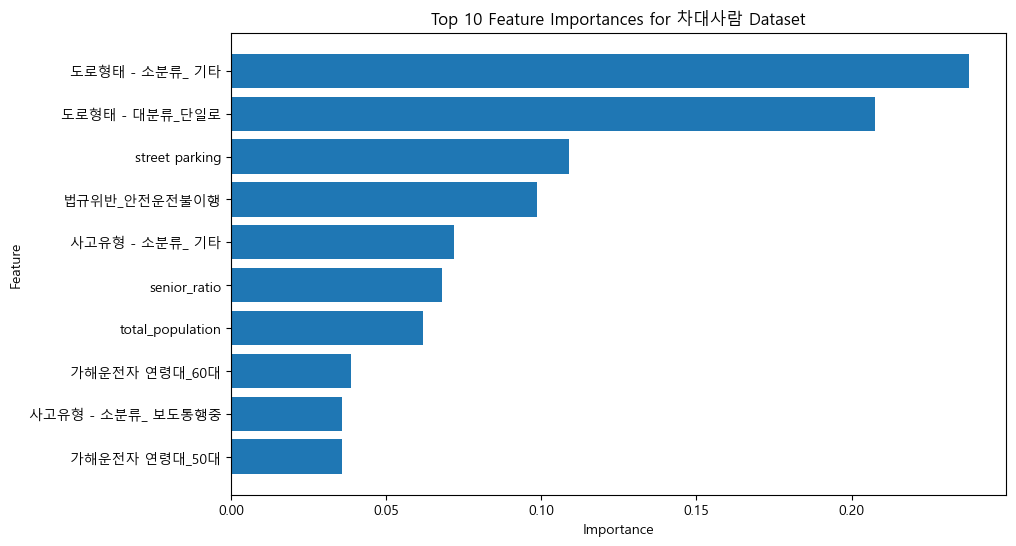

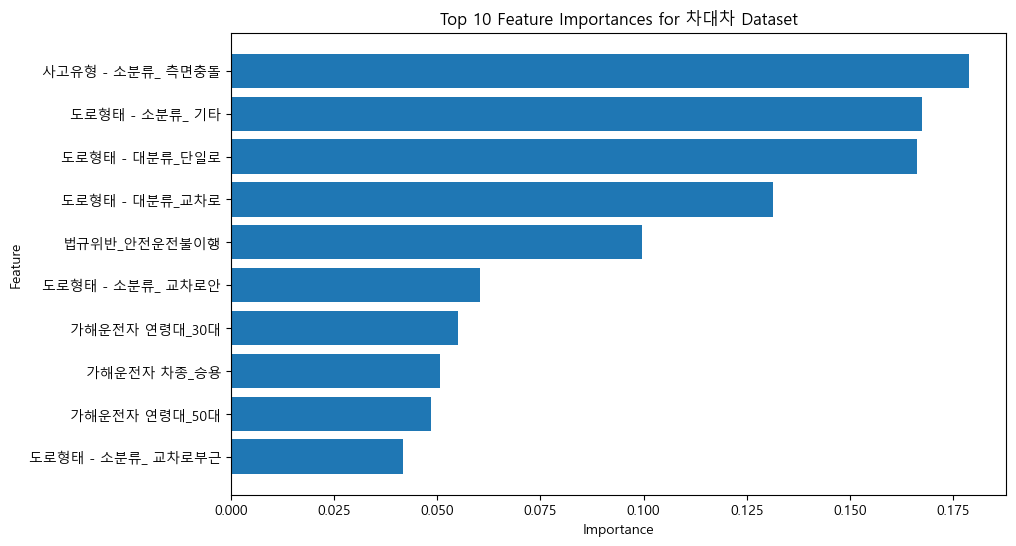

Top 10 Feature Importances for 차대사람 Dataset:
              Feature  Importance
4      도로형태 - 소분류_ 기타    0.237872
3      도로형태 - 대분류_단일로    0.207507
9      street parking    0.108993
2        법규위반_안전운전불이행    0.098697
0      사고유형 - 소분류_ 기타    0.071760
10       senior_ratio    0.067953
8    total_population    0.061931
7       가해운전자 연령대_60대    0.038793
1   사고유형 - 소분류_ 보도통행중    0.035685
6       가해운전자 연령대_50대    0.035649
Top 10 Feature Importances for 차대차 Dataset:
             Feature  Importance
0   사고유형 - 소분류_ 측면충돌    0.178891
6     도로형태 - 소분류_ 기타    0.167568
3     도로형태 - 대분류_단일로    0.166215
2     도로형태 - 대분류_교차로    0.131423
1       법규위반_안전운전불이행    0.099572
5   도로형태 - 소분류_ 교차로안    0.060426
8      가해운전자 연령대_30대    0.055125
7        가해운전자 차종_승용    0.050560
9      가해운전자 연령대_50대    0.048448
4  도로형태 - 소분류_ 교차로부근    0.041774


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
data1.drop(columns='행정동', inplace=True)
data2.drop(columns='행정동', inplace=True)
# Set up font for Korean characters
font_path = "c:/Windows/Fonts/malgun.ttf"  # Windows의 경우
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

# Preparing the data for the model
def prepare_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X = pd.get_dummies(X, drop_first=True)  # Handling categorical variables
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model and evaluating it
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    feature_importances = model.feature_importances_
    return r2, feature_importances, X_train.columns

# Step 1: Feature Selection
def select_important_features(X_train, X_test, importances, threshold=0.02):
    important_features = [feature for feature, importance in zip(X_train.columns, importances) if importance > threshold]
    return X_train[important_features], X_test[important_features]

# Initial training to get feature importances
X_train_data1, X_test_data1, y_train_data1, y_test_data1 = prepare_data(data1, '평균 ECLO')
r2_data1, feature_importances_data1, feature_names_data1 = train_and_evaluate_model(X_train_data1, X_test_data1, y_train_data1, y_test_data1)

X_train_data2, X_test_data2, y_train_data2, y_test_data2 = prepare_data(data2, '평균 ECLO')
r2_data2, feature_importances_data2, feature_names_data2 = train_and_evaluate_model(X_train_data2, X_test_data2, y_train_data2, y_test_data2)

# Displaying initial R-squared values
print(f'Initial R2 Score for 차대사람 dataset: {r2_data1}')
print(f'Initial R2 Score for 차대차 dataset: {r2_data2}')

# Step 1: Feature Selection based on initial importances
X_train_data1_selected, X_test_data1_selected = select_important_features(X_train_data1, X_test_data1, feature_importances_data1)
X_train_data2_selected, X_test_data2_selected = select_important_features(X_train_data2, X_test_data2, feature_importances_data2)

# Step 3: Retrain and evaluate the model with selected features
r2_data1_selected, feature_importances_data1_selected, _ = train_and_evaluate_model(X_train_data1_selected, X_test_data1_selected, y_train_data1, y_test_data1)
r2_data2_selected, feature_importances_data2_selected, _ = train_and_evaluate_model(X_train_data2_selected, X_test_data2_selected, y_train_data2, y_test_data2)

# Displaying R-squared values after feature selection
print(f'R2 Score for 차대사람 dataset after feature selection: {r2_data1_selected}')
print(f'R2 Score for 차대차 dataset after feature selection: {r2_data2_selected}')

# Preparing feature importances for display
feature_importances_df1 = pd.DataFrame({'Feature': X_train_data1_selected.columns, 'Importance': feature_importances_data1_selected}).sort_values(by='Importance', ascending=False)
feature_importances_df2 = pd.DataFrame({'Feature': X_train_data2_selected.columns, 'Importance': feature_importances_data2_selected}).sort_values(by='Importance', ascending=False)

# Function to plot feature importances
def plot_feature_importances(feature_importances_df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances_df['Feature'][:10], feature_importances_df['Importance'][:10])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plotting feature importances for both datasets
plot_feature_importances(feature_importances_df1, 'Top 10 Feature Importances for 차대사람 Dataset')
plot_feature_importances(feature_importances_df2, 'Top 10 Feature Importances for 차대차 Dataset')

# Displaying top 10 feature importances
print('Top 10 Feature Importances for 차대사람 Dataset:')
print(feature_importances_df1.head(10))
print('Top 10 Feature Importances for 차대차 Dataset:')
print(feature_importances_df2.head(10))
